# Decision Tree

In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
import pandas as pd

wine = pd.read_csv('../data/wine.csv')
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [9]:
# class의 종류

wine['class'].unique()

array([0., 1.])

> 0 : red_wine, 1: white whine

In [12]:
# 기본통계량
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [13]:
wine.shape

(6497, 4)

### Feature와 Target

In [15]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

### Train과 Target

In [ ]:
from sklearn.model_selection import train_test_split


train_input, test_input, train_target, test_target = train_test_split(
    data,
    target, 
    test_size=0.2,
    random_state=42,
    
)

In [17]:
# Train과 Test의 크기 확인

print('Train :', train_input.shape)
print("Test :", test_input.shape)

Train : (5197, 3)
Test : (1300, 3)


### 정규화

In [18]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

std.fit(train_input)
train_scaled = std.transform(train_input)
test_sclaed =  std.transform(test_input)

### 로지스틱 회귀 모델 생성

In [30]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(train_scaled, train_target)
print('Train score :', lg.score(train_scaled, train_target))
print('Test  score :', lg.score(test_sclaed, test_target))

Train score : 0.7808350971714451
Test  score : 0.7776923076923077


### 가중치와 편차 구하기

In [27]:
print("가중치 :",lg.coef_.squeeze(), "편차 :", lg.intercept_)

가중치 : [ 0.51268071  1.67335441 -0.68775646] 편차 : [1.81773456]


---
### 결정 트리(Decision Tree)
: 선형회귀나 KNN처럼 전처리 과정이 필요없다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

dt1 = DecisionTreeClassifier(random_state=42)

dt1.fit(train_scaled, train_target)
print(dt1.score(train_scaled, train_target))
print(dt1.score(test_sclaed, test_target))

0.996921300750433
0.8584615384615385


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

dt1 = DecisionTreeClassifier(random_state=42)

dt1.fit(train_scaled, train_target)
print(dt1.score(train_scaled, train_target))
print(dt1.score(test_sclaed, test_target))

0.996921300750433
0.8584615384615385


### 시각화

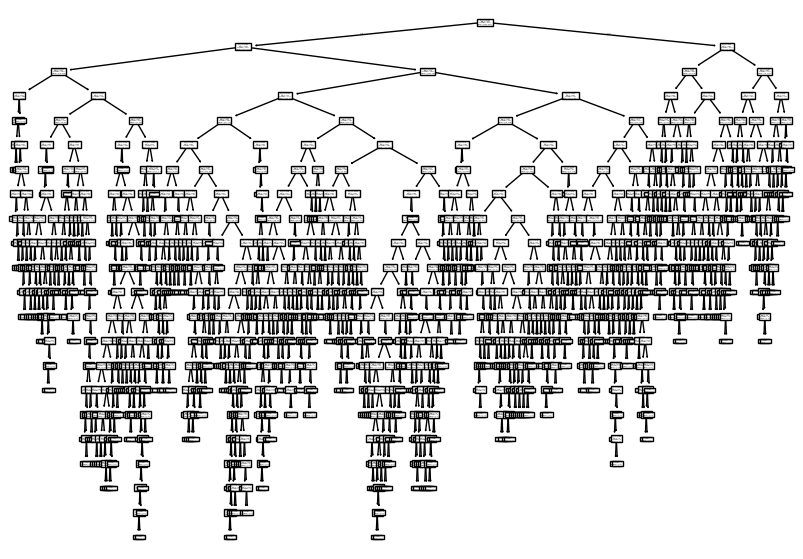

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)

plt.show()


> 맨 위의 단계를 root node라고 하고, 맨 마지막 단계는 leaf_node라고 한다.  
시간이 많이 걸리고 단계가 너무 복잡하다.

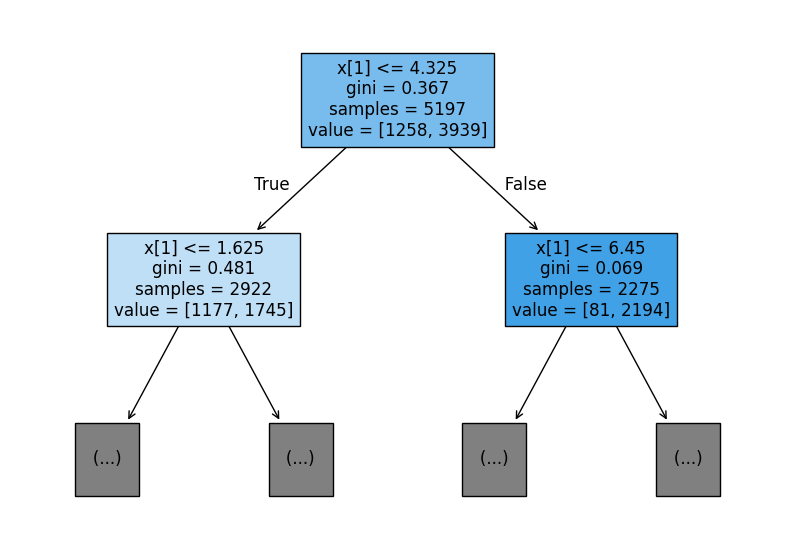

In [52]:
## decision tree의 단계(depth) 를 단순하게 하자..
plt.figure(figsize=(10, 7))
plot_tree(dt,  max_depth=1, filled=True)

plt.savefig('wow.png')
plt.show()

> 지니 불순도(Gini Impurity)     
지니 불순도 = 1 - (음성 클래스비율 ^2 + 양성클래스비율^2)  
지니 불순도가 0이 나올때 순수노드라고 한다.     
leaf node를 순수노드로 작업하는 건 좋으나, 이때 과대적합이 발생한다.  
따라서 max_depth를 찾는 것이 중요하다.     


In [54]:
1 - ((1258/5197)**2 + (3939/5197) ** 2)

0.3669367279393918

### 가지치기(Tree Pruning)
- max_depth의 값을 조절한다.
- Decision Tree의 과대적합을 막는다. 
- 선형 회귀식 처럼 L1규제, L2규제를 사용할 수 없다.

In [58]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3)

dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


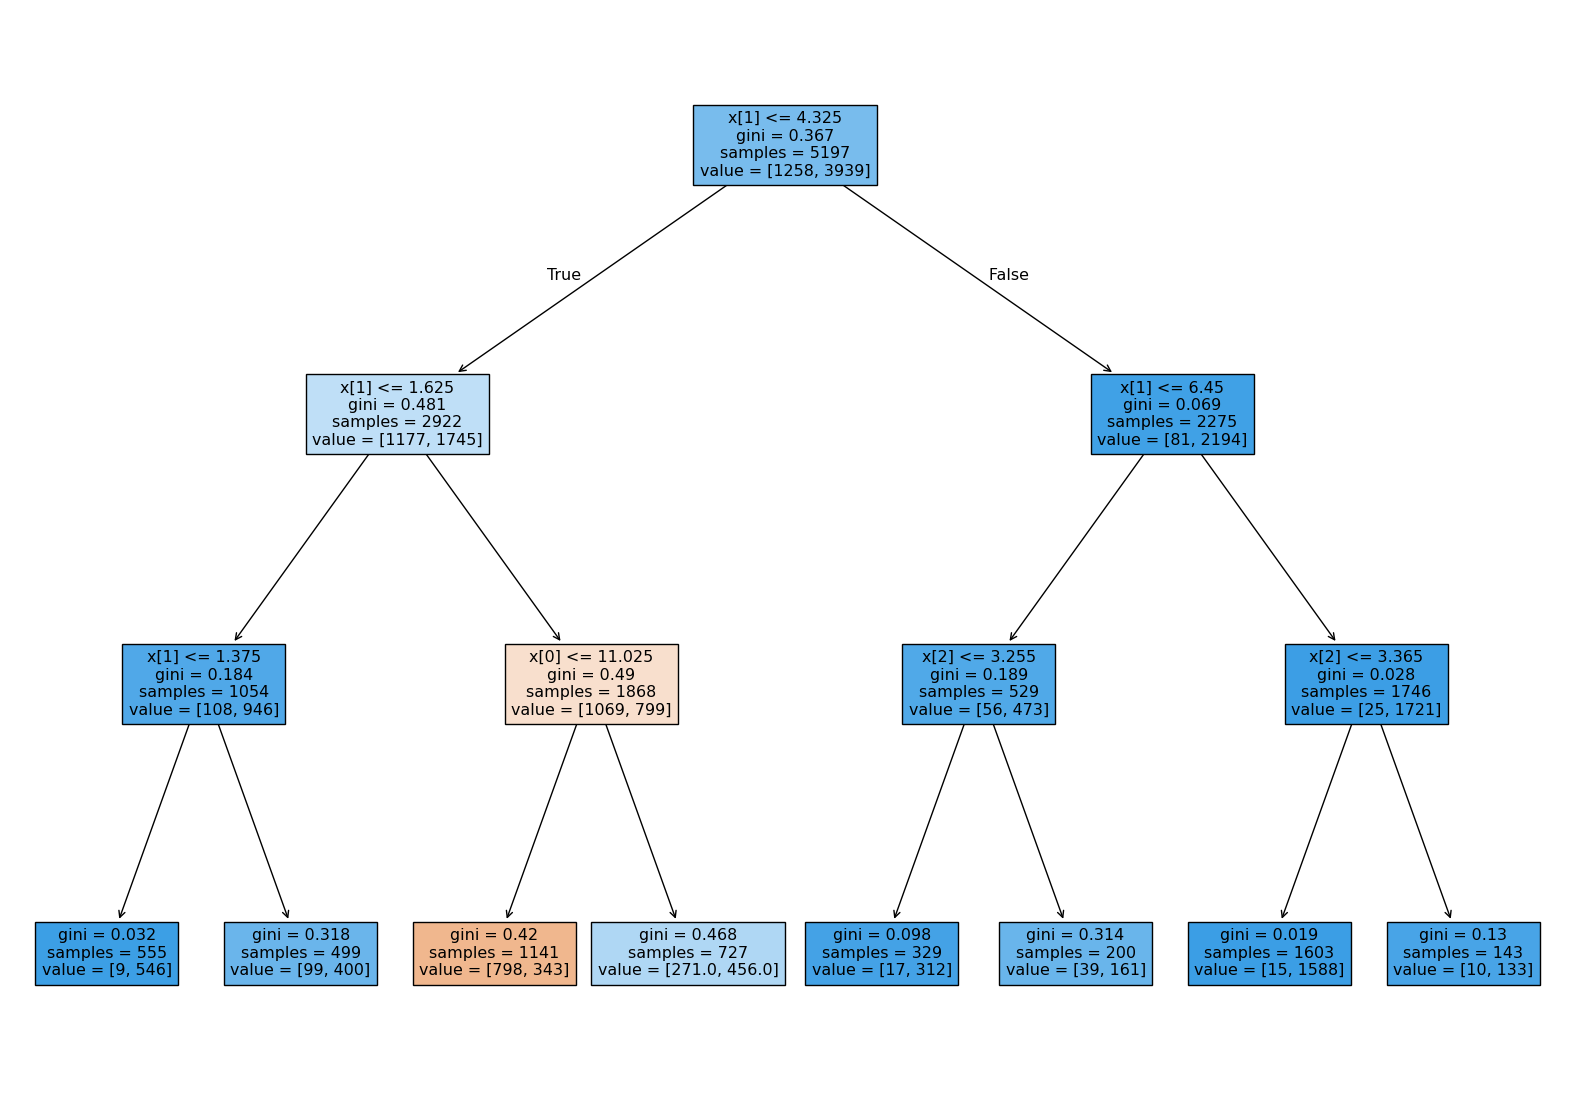

In [60]:
plt.figure(figsize=(20, 14))
plot_tree(dt, filled=True)

plt.show()

In [65]:
# 특성 중요도
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])

> alcohol, sugar, pH의 순으로 출력되며  
이중 sugar가 제일 중요한 요소로 작동된다는 것을 알 수 있다.

---
### 최적화 시키기

In [70]:
dt = DecisionTreeClassifier(random_state=42, min_impurity_decrease=0.0005) # 0.05%
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


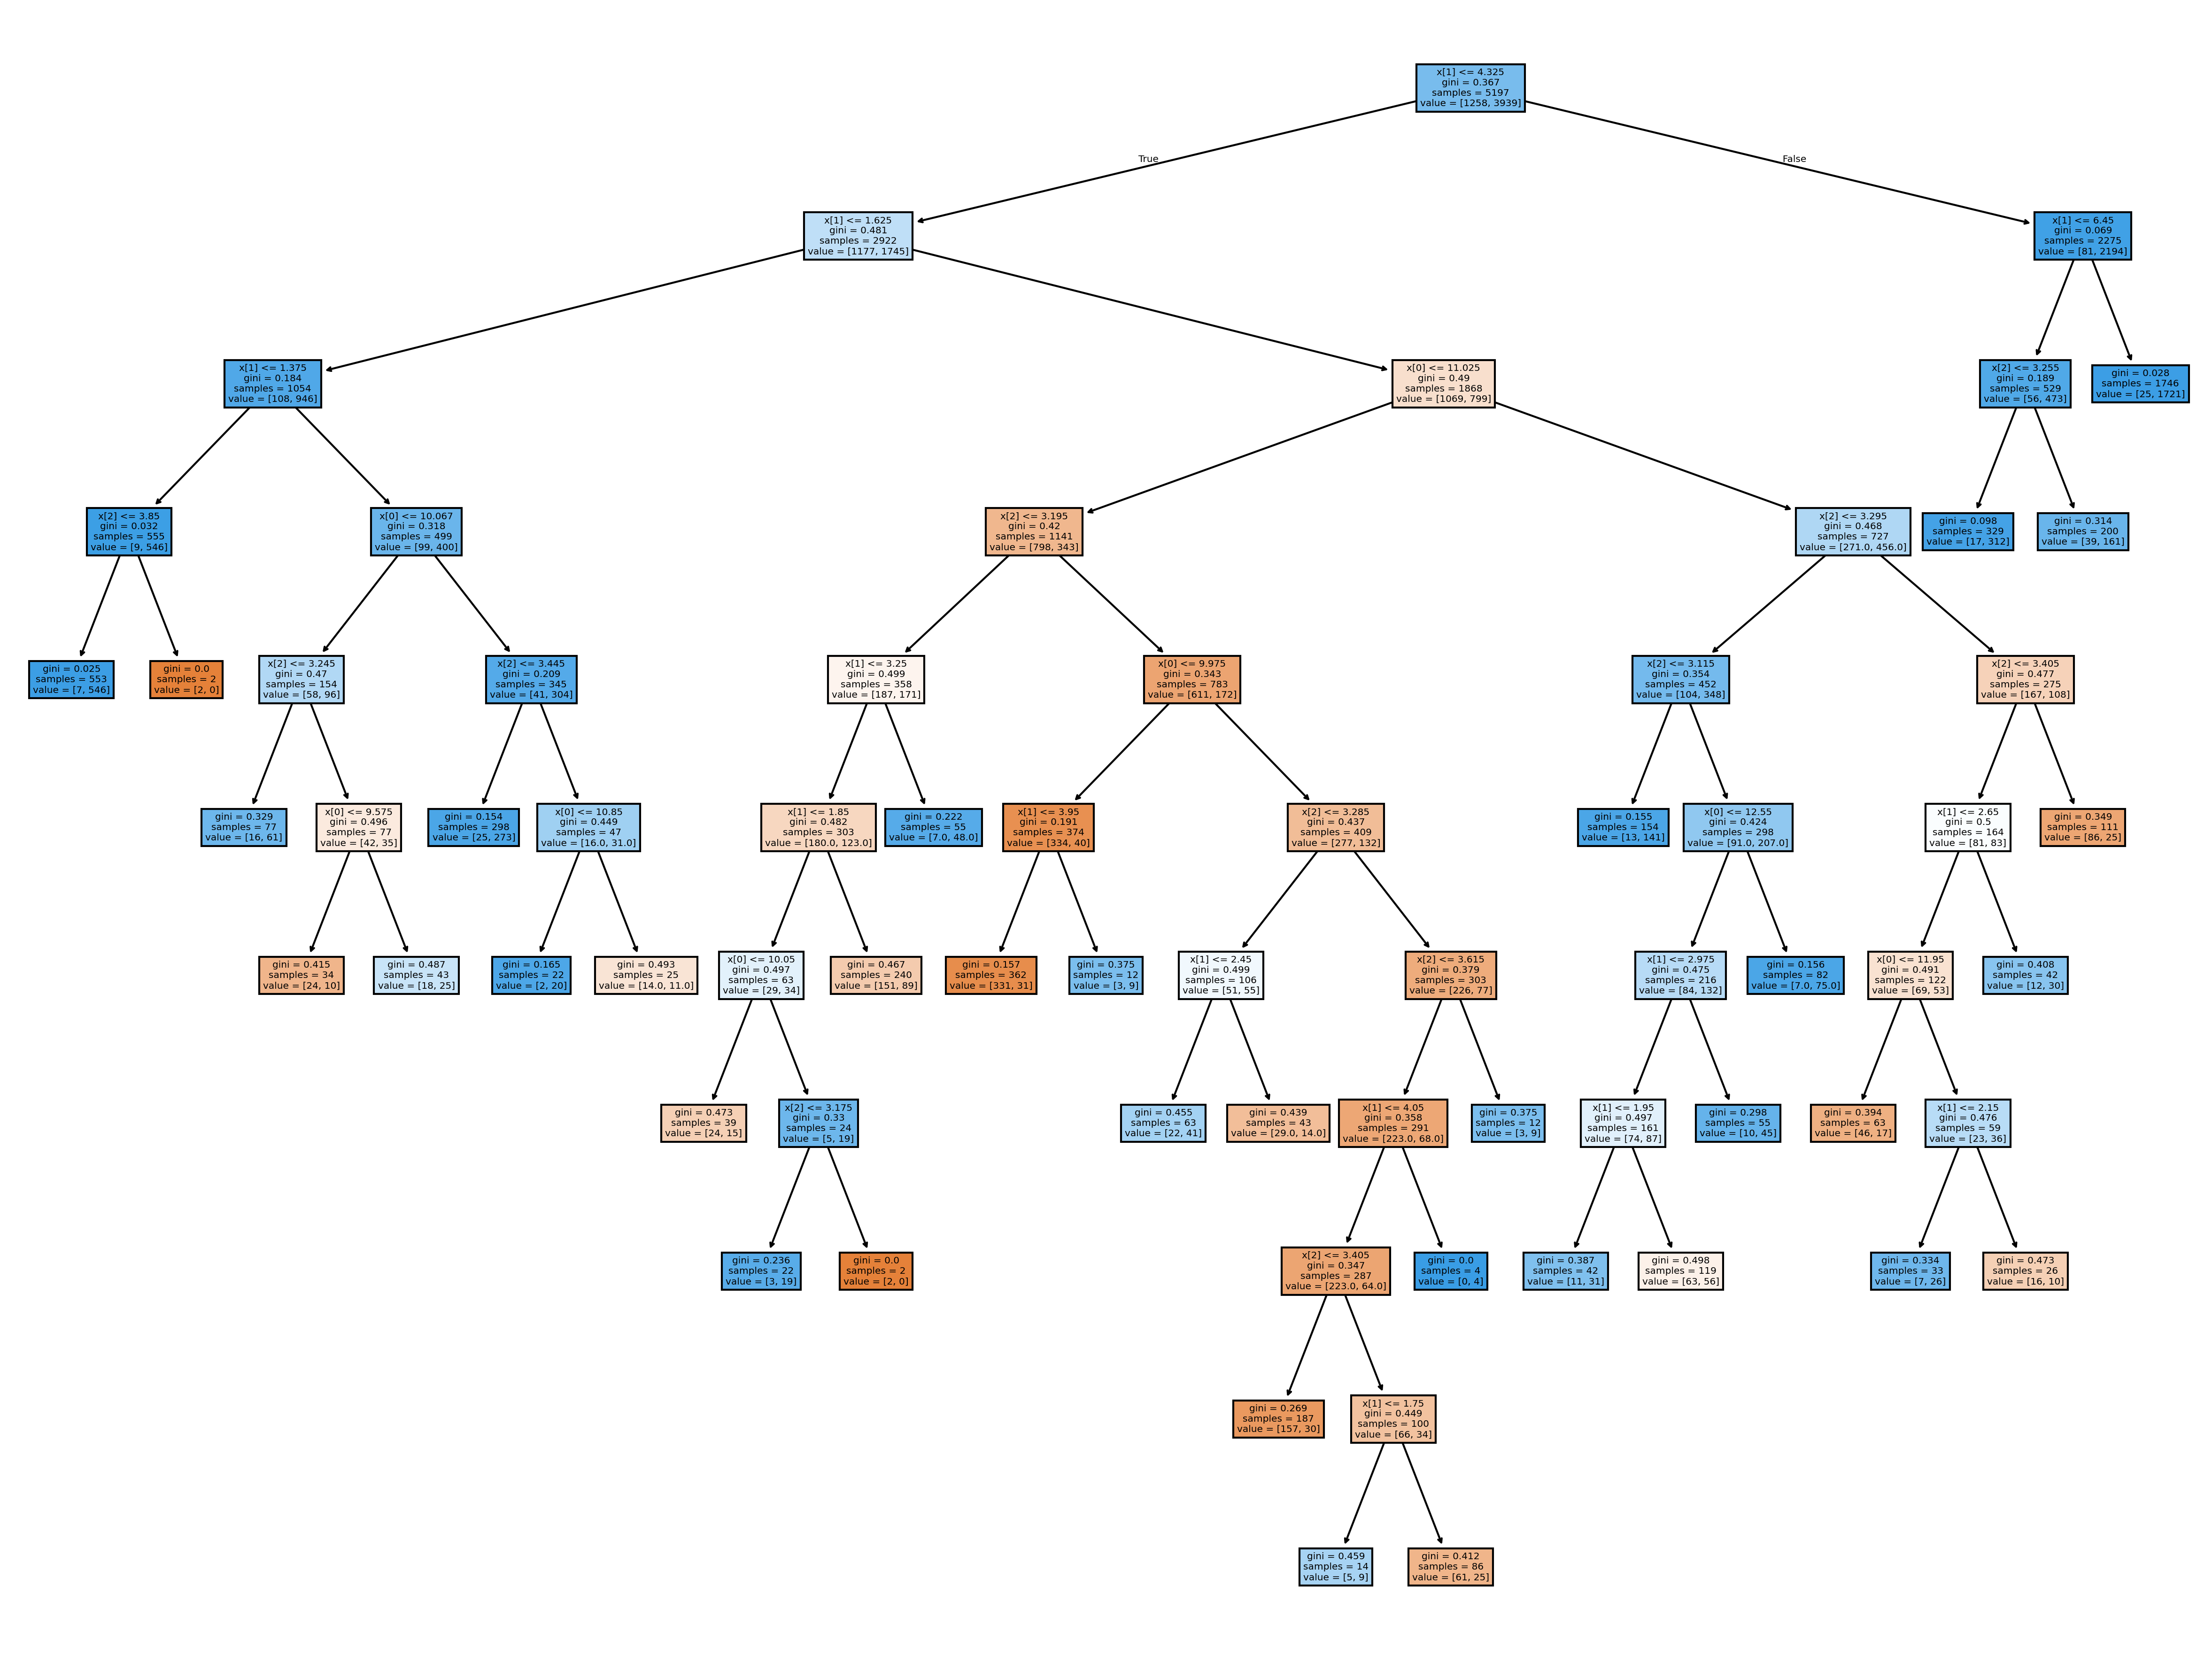

In [74]:
plt.figure(figsize=(20,15), dpi = 300)
plot_tree(dt, filled=True)
plt.savefig('../data/wine.jpg')
plt.show()